# Content

## Techniques and Algorithms
* Partitional (K-means)
* Hierarchical (Hierarchical Agglomerative Clustering)
* Density (DBScan)
* Self-organizing (SOM)

## Evaluation Metrics
* V-Measure Score (Homogeneity and Completeness)
* Silhouette Score
* Adjusted Rand Index (ARI)

## Introdução

* Nesta aula estudaremos técnicas e algoritmos de clustering;
* Em AM, os algoritmos de clustering são classificados como algoritmos não supervisionado;
* Algoritmos não supervisionados tem por objetivo encontrar subgrupos de exemplos que concentram mais características em comum entre si do que com exemplos em outros grupos, e.g. (encontrar grupos de clientes que tenham o mesmo perfil de compra);
* Os algoritmos de clustering dividem as amostras em grupos baseado em um função de (dis)similaridade/distância;
* A escolha da função de distância é dependente dos dados;
* As funções de distâncias mais populares são: euclidiana, cosseno e correlação para dados numéricos; e manhattan e jaccard para dados categóricos;
* Os algoritmos de clustering podem ser classificados de acordo com as técnicas que utilizam, e.g. (podem buscar os grupos dividindo as amostras em subgrupos (o conjunto de todas é um único cluster), sendo chamados de ***particionais***; ou podem reunir amostras mais comuns em um grupo (cada amostra é inicialmente um grupo), sendo chamados de ***aglomerativos***;
* Nesta aula veremos 4 técnicas e algoritmos (aglomerativos, particionais, densidade, e auto-organizáveis);
* Além disso, iremos aprender a avaliar os resultados do agrupamento considerando 3 métricas;
* O dataset que iremos nos basear para os exemplos é o IRIS;

## Dataset

In this lesson we will use the Iris dataset to demonstrate the operation of the algorithms.

* Iris dataset (info)
    * 150 samples
    * 3 classes (setosa, veriscolor, virgínica)
    * https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data[:, :]
y = iris.target

### Visualization dataset

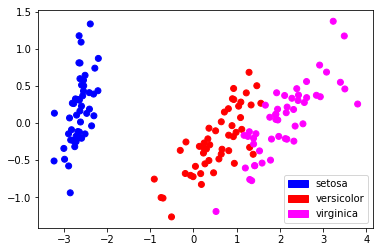

In [3]:
label_name = iris.target_names

from sklearn.decomposition import PCA
data = PCA(n_components=2).fit_transform(X)

color_label = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'magenta'}
y_label = [label_name[x] for x in y]
label_color = [color_label[x] for x in y_label]

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


plt.scatter(data[:, 0], data[:, 1], c=label_color)
team_patches = [mpatches.Patch(color=color, label=team) for team, color in color_label.items()]
plt.legend(handles=team_patches)

## K-means

* O algoritmo K-means é um método de clustering que tem por objetivo particionar n pontos de dados em k grupos;
* Cada ponto de dados pertence a um grupo. A atribuição de um ponto para um grupo pode ser dada por medidas de si/dissimilaridade (e.g. distância euclidiana), que busca calcular a distância entre um ponto e o centróide de cada grupo;
* Esse algoritmo requer um número k de clusters;
* Inicialmente é selecionado k pontos aleatórios como centróides de cada grupo;
* O algoritmo calcula a distância de cada ponto com todos os centróides, ao final dessa iteração os centróides de cada grupo serão recalculados;
* O novo centróide do grupo será calculado com base na média de todos os pontos atribuídos a ele;
* Esse processo é iterativo e converge quando nenhum ponto mudar de cluster.

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init=20)
kmeans.fit(X)
y_pred = kmeans.labels_

"""
Some parameters:

n_clusters : int, optional, default: 8
The number of clusters to form as well as the number of centroids to generate.

init : {‘k-means++’, ‘random’ or an ndarray}
Method for initialization, defaults to ‘k-means++’:

‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.

‘random’: choose k observations (rows) at random from data for the initial centroids.

If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

n_init : int, default: 10
Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
"""

'\nSome parameters:\n\nn_clusters : int, optional, default: 8\nThe number of clusters to form as well as the number of centroids to generate.\n\ninit : {‘k-means++’, ‘random’ or an ndarray}\nMethod for initialization, defaults to ‘k-means++’:\n\n‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.\n\n‘random’: choose k observations (rows) at random from data for the initial centroids.\n\nIf an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.\n\nn_init : int, default: 10\nNumber of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.\n'

#### Visualizando resultados do agrupamento (K-means)

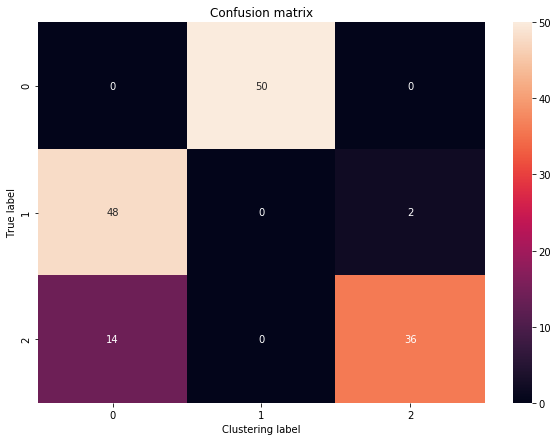

In [5]:
import sklearn.metrics
import seaborn as sns
confusion_matrix = sklearn.metrics.confusion_matrix(y, y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Clustering label')
plt.show()

## Visualizando os centróides de cada grupo

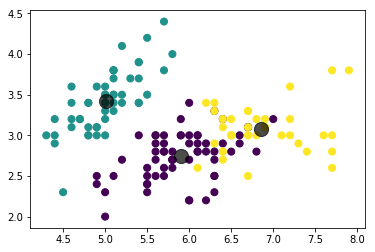

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7);

http://www.fsma.edu.br/si/edicao4/FSMA_SI_2009_2_Tutorial.pdf
http://www.lbd.dcc.ufmg.br/colecoes/enia/2005/061.pdf

## Hierarchical Agglomerative Clustering

* Duas abordagens podem ser derivadas do clustering hierarquico: top-down(divisivo) e bottom-up (aglomerativo);
* Na abordagem bottom-up  os dados são inicialmente distribuídos de modo que cada exemplo represente um cluster e, entao, esses clusters são recursivamente agrupados considerando alguma medida de similaridade, até que todos os exemplos pertençam a apenas um cluster;
* Para exemplificar, iremos verificar o funcionamento do algoritmo HAC;